# Analyzing Customer Churn

### Team No. 9
Taranjit Singh Kenth - Kota Kimura - Jill Padsala - Santiago Crane Pardo - Kodchakorn Pratumkaew - Yutaro Takasaki.





## Introduction 

The process of building a predictive model involves several stages, including understanding, cleaning, and analyzing the data, followed by model selection and evaluation. This process requires a good understanding of the data and the business problem, as well as a solid foundation in statistical and machine learning techniques.

In this project, we worked with a telecommunications company to predict customer churn. The goal was to identify which customers are likely to leave and take proactive steps to reduce the churn rate. To achieve this, we followed a comprehensive approach to build predictive models that accurately classify customers as churners or non-churners.

First, we explored and cleaned the data by identifying missing values, dealing with outliers, and removing redundant features. We then analyzed the data to understand the relationships between the features and the target variable. This analysis helped us identify the most important features and the key drivers of customer churn.

After cleaning and analyzing the data, we selected several machine learning models to predict customer churn, including logistic regression, decision tree, random forest, and gradient boosting machines (GBM). We trained these models on the cleaned data and evaluated their performance on a holdout test set.

## Recomendations

##### Technology
Our analysis of the model obtained shows that customers who utilize Tech support or Online security services are less likely to churn. Additionally, customers with longer tenures are less likely to churn. To address this, we recommend that the company focus on promoting Tech support and Online security services to customers and educate the sales department on the benefits of these services. By providing these services, the company can mitigate the risk of churn and increase customer satisfaction, which in turn may lead to longer tenures and a decrease in churn rates.

##### Telecom Free:   
The most important feature contributing to customer churn is the price that the company charges its customers which is 65.05 on average.  
If the company were to increase its fees, it could potentially reduce its customer base, which would adversely affect its performance. 
Therefore, we recommend that the company maintain its current pricing policy to remain competitive with its competitors. 
However, it should be noted that pricing policies only partially influence customer attrition. As such, the company should explore new promotional 
strategies to continue to convince its customers to stay.

##### Contract length:
the length of the contract is the second most significant factor that contributes to customer churn, as customers are more likely to cancel their service if they are under contract for more than one year. The existence of cancellation fees in the contracts could be a possible underlying cause.

To address this, we would recommend that the company continue to include cancellation fees in as many contracts as possible to discourage customers from cancelling their service prematurely. However, it is important to consider the potential impact on customer satisfaction and long-term loyalty.



## Result Analysis

Among the models presented, the Tuned GBM model achieved the best performance, with a testing accuracy of 0.9035 and an AUC score of 0.858. The Tuned GBM model also had the lowest train-test gap of 0.0797, indicating that it generalized well to unseen data.

The Random Forest model had the highest training accuracy, but its testing accuracy was lower than the Tuned GBM model, indicating that it might have overfit the training data. The Decision Tree model had the smallest gap, but its testing accuracy was still lower than the Tuned GBM model.

Overall, the Tuned GBM model is the best model for predicting churn based on the performance metrics presented. The total script run time of 5.44 minutes also suggests that the model training and evaluation were done efficiently.

## Data Cleaning

In order to build prediction models, it is essential to have a thorough understanding of the data at hand. This involves several steps such as importing the necessary libraries and functions, creating user-defined functions, and analyzing the data to identify any potential outliers or redundant variables. In addition, it is important to clean the data and handle any null values in order to ensure accurate predictions.

To achieve this, several steps were taken. First, all necessary libraries and functions were imported. Next, user-defined functions such as confusion_matrix and plot_outlier_flags were created to aid in data analysis. A new data set was then created with only the required columns, and any data that could not be cleaned due to potential inaccuracies was dropped. Redundant variables were grouped and the data was specified as either numeric or categorical before being converted to dummy variables.

After cleaning the data, null values were checked and handled appropriately. Finally, a feature groups dictionary was created to aid in the analysis and visualization of the data.

By following these steps, it was possible to gain a comprehensive understanding of the data and build accurate prediction models.

In [1]:
# import all fuction and libraly that need to use

!pip install pydotplus
!pip install imblearn

import pandas as pd                     # data sceince essentials
import matplotlib.pyplot as plt         # essential graphical output
import seaborn as sns                   # enhanced visualizations
import numpy as np                      # mathematical essentials
from tqdm.notebook import tqdm          # progress bars
import time                             # time essentials
import itertools

t0 = time.time()                        # start time of notebook


from sklearn.feature_selection import SelectFromModel   # feature selection
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.linear_model import LogisticRegression     # logistic regression

import statsmodels.formula.api as smf                   # logistic regression

from sklearn import metrics                             # metrics
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.metrics import classification_report       # classification report
from sklearn.metrics import make_scorer                 # customizable scorer



from sklearn.cluster import KMeans                      # KMeans for segmentation

from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.preprocessing import MinMaxScaler          # minmax scaler
from sklearn.preprocessing import RobustScaler          # robust scaler

from sklearn.neighbors import KNeighborsClassifier      # KNN for classification

from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import export_graphviz                # exports graphics

from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

from six import StringIO                                # saves objects in memory
from IPython.display import Image                       # displays on frontend
#import pydotplus                                        # interprets dot objects

from imblearn.over_sampling import SMOTE                # oversampling



Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 278.7/278.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=571cc17399fbfa1196ede2003ccbda77564b48afb1cf4850ea8ee4dd206b3798
  Stored in directory: c:\users\santi\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# create User defined functions

########################################
# confusion_matrix
########################################
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("""
Normalized confusion matrix""")


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Source of function: ML with Python by IBM on Coursera


########################################
# flag_above_average
########################################
def flag_above_average(data, variable):
    """
    This function takes in a dataframe and a variable.
    
    Then, it calculates average of the variable.
    
    Then, it flags any data point that precedes the mean of the variable and
    calls the new variable above_avg_VARIABLE
    
    -----------
    Parameters:
    - DATA: dataframe
    - VARIABLE: column within dataframe
    """
    # Create placeholder for average flag
    data['above_avg_'+variable] = 0
    
    # Instantiate average of variable
    average = data[variable].mean()
    
    # Loop over each column to change its respective flag
    for index, column in data.iterrows():
        
        # Set conditional for variable & upper threshold
        if data.loc[index, variable] > average:
            
            # Change average flag
            data.loc[index, 'above_avg_'+variable] = 1
    
    # Check for any variables with < 100 samples and delete them
    if data['above_avg_'+variable].sum() < 100:
        del data['above_avg_'+variable]
        

########################################
# flag_outliers
########################################
def flag_outliers(data, variable):
    """
    This function takes in a dataframe and a variable.
    
    Then, it calculates the 25th and 75th quantiles of the variable.
    
    Then, it flags 
    
    1) any data point that precedes the 25th quantile under a variable 
    called low_out_VARIABLE.
    
    2) any data point that exceeds the 75th quantile under a variable called
    high_out_variable. 
    
    Then, it deletes any out_VARIABLE with less than 100 samples on either
    side of the flag.
    
    -----------
    Parameters:
    - DATA: dataframe
    - VARIABLE: column within dataframe as string
    """
    # Create placeholder for outlier flag
    data['high_out_'+variable] = 0
    data['low_out_'+variable]  = 0
    
    # Set upper and lower thresholds
    lower_threshold = pd.DataFrame(data.quantile(.25, axis = 0))
    upper_threshold = pd.DataFrame(data.quantile(.75, axis = 0))
    
    # Rename columns for indexing
    lower_threshold.columns = ['LOWER']
    upper_threshold.columns = ['UPPER']
    
    # Loop over each column to change its respective flag
    for index, column in data.iterrows():
        
        # Set conditional for variable & upper threshold
        if data.loc[index, variable] > upper_threshold.loc[variable, 'UPPER']:
            
            # Change outlier flag
            data.loc[index, 'high_out_'+variable] = 1
            
        # Set conditional for variable & lower threshold
        if data.loc[index, variable] < lower_threshold.loc[variable, 'LOWER']:
        
            # Change outlier flag
            data.loc[index, 'low_out_'+variable] = 1
    
    # Check for any variables with < 100 outliers and delete them
    if data['high_out_'+variable].sum() < 100:
        del data['high_out_'+variable]
        
    if data['low_out_'+variable].sum() < 100:
        del data['low_out_'+variable]

        
########################################
# plot_outlier_flags
########################################
def plot_outlier_flags(data, variable):
    """
    This function will take a dataframe and variable and plot the count
    of that variable in a bar plot.
    """
    # Create plot
    ax = data[variable].value_counts().plot(kind     = 'bar',
                                            figsize  = (8,6),
                                            rot      = 0,
                                            colormap = 'Paired')
    
    # Annotate plot with values
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 6),
                    textcoords='offset points')
        
    # Set plot aesthetics
    ax.set_ylabel('# Customers',size = 14)
    ax.set_xlabel('')
    ax.set_title(variable, size = 14)
    
    # Display plot
    plt.show()

In [3]:
# Importing csv file in Pandas
raw_data = pd.read_csv("A2.csv", low_memory = True)


# Creating new data set with only required columns

#raw_data.columns
raw_data_1 = raw_data [['Unnamed: 0',
                   'gender',
                   #'SeniorCitizen',
                   #'Partner',
                   'tenure',
                   'PhoneService', 
                   'MultipleLines', 
                   'InternetService', 
                   'OnlineSecurity',
                   'OnlineBackup', 
                   'DeviceProtection', 
                   'TechSupport', 
                   'StreamingTV',
                   'StreamingMovies', 
                   'Contract', 
                   #'PaperlessBilling', 
                   'TotalCharges',
                   'Churn', 
                   'Geography', 
                   'CreditScore', 
                   #'Surname', 
                   'EstimatedSalary',
                   #'MonthlyCharges', 
                   #'customerID', 
                   #'Dependents', 
                   'PaymentMethod',
                   'Charge']]

raw_data_1 = raw_data_1.reset_index().rename(columns = {'Unnamed: 0' : 'no.'}).set_index('no.')

#raw_data_1.head()
raw_data_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             8000 non-null   int64  
 1   gender            7938 non-null   object 
 2   tenure            7938 non-null   float64
 3   PhoneService      7947 non-null   object 
 4   MultipleLines     7933 non-null   object 
 5   InternetService   7944 non-null   object 
 6   OnlineSecurity    7941 non-null   object 
 7   OnlineBackup      7960 non-null   object 
 8   DeviceProtection  7953 non-null   object 
 9   TechSupport       7954 non-null   object 
 10  StreamingTV       7950 non-null   object 
 11  StreamingMovies   7947 non-null   object 
 12  Contract          7952 non-null   object 
 13  TotalCharges      7961 non-null   object 
 14  Churn             7934 non-null   object 
 15  Geography         7948 non-null   object 
 16  CreditScore       7938 non-null   float64


In [4]:
# drop data that cannot clean becuase It's might effect to incorrect predicted model
#clean_data = raw_data_1.dropna(subset = 'Churn') ## 66 
clean_data = raw_data_1.drop(raw_data_1[raw_data_1['Churn'].isnull()].index)
clean_data = raw_data_1.drop(raw_data_1[raw_data_1['gender'].isnull()].index)
#clean_data = raw_data_1.dropna(subset = 'gender') ## 62 total 128/8000 = 1.6%


clean_data_2 = clean_data.copy()
#----------------------------------------------------------------------------------------------------------------------
# Clean data for phone and internet services
# if no internet, all the services that related to internet might not services
clean_data.loc[clean_data.InternetService == 'No','OnlineSecurity']    = clean_data.loc[clean_data.InternetService == 'No','OnlineSecurity'].fillna('No internet service')
clean_data.loc[clean_data.InternetService == 'No','OnlineBackup']      = clean_data.loc[clean_data.InternetService == 'No','OnlineBackup'].fillna('No internet service')
clean_data.loc[clean_data.InternetService == 'No','DeviceProtection']  = clean_data.loc[clean_data.InternetService == 'No','DeviceProtection'].fillna('No internet service')
clean_data.loc[clean_data.InternetService == 'No','TechSupport']       = clean_data.loc[clean_data.InternetService == 'No','TechSupport'].fillna('No internet service')
clean_data.loc[clean_data.InternetService == 'No','StreamingTV']       = clean_data.loc[clean_data.InternetService == 'No','StreamingTV'].fillna('No internet service')
clean_data.loc[clean_data.InternetService == 'No','StreamingMovies']   = clean_data.loc[clean_data.InternetService == 'No','StreamingMovies'].fillna('No internet service')

clean_data.loc[clean_data.PhoneService == 'No','MultipleLines']        = clean_data.loc[clean_data.PhoneService == 'No','MultipleLines'].fillna('No phone service')
clean_data.loc[clean_data.MultipleLines == 'No phone service','PhoneService']    = clean_data.loc[clean_data.MultipleLines == 'No phone service','PhoneService'].fillna('No')
clean_data.loc[clean_data.MultipleLines == 'Yes','PhoneService']                 = clean_data.loc[clean_data.MultipleLines == 'Yes','PhoneService'].fillna('Yes')
clean_data.loc[clean_data.InternetService == 'Fiber optic','PhoneService']       = clean_data.loc[clean_data.InternetService == 'Fiber optic','PhoneService'].fillna('Yes')

#Copy 
clean_data_2 = clean_data.copy()


# the rest fill every with mode
#calculate mode
mode_PhoneService                = clean_data["PhoneService"].mode()[0]
mode_MultipleLines               = clean_data["MultipleLines"].mode()[0]
mode_InternetService             = clean_data["InternetService"].mode()[0]
mode_OnlineSecurity              = clean_data["OnlineSecurity"].mode()[0]
mode_OnlineBackup                = clean_data["OnlineBackup"].mode()[0]
mode_DeviceProtection            = clean_data["DeviceProtection"].mode()[0]
mode_TechSupport                 = clean_data["TechSupport"].mode()[0]
mode_StreamingTV                 = clean_data["StreamingTV"].mode()[0]
mode_StreamingMovies             = clean_data["StreamingMovies"].mode()[0]

#replace the rest na with mode
clean_data_2["OnlineSecurity"]      = clean_data_2["OnlineSecurity"].fillna(mode_OnlineSecurity)
clean_data_2["OnlineBackup"]        = clean_data_2["OnlineBackup"].fillna(mode_OnlineBackup)
clean_data_2["DeviceProtection"]    = clean_data_2["DeviceProtection"].fillna(mode_DeviceProtection)
clean_data_2["TechSupport"]         = clean_data_2["TechSupport"].fillna(mode_TechSupport)
clean_data_2["StreamingTV"]         = clean_data_2["StreamingTV"].fillna(mode_StreamingTV)
clean_data_2["StreamingMovies"]     = clean_data_2["StreamingMovies"].fillna(mode_StreamingMovies)
clean_data_2["PhoneService"]        = clean_data_2["PhoneService"].fillna(mode_PhoneService)
clean_data_2["MultipleLines"]       = clean_data_2["MultipleLines"].fillna(mode_MultipleLines)
clean_data_2["InternetService"]       = clean_data_2["InternetService"].fillna(mode_InternetService)

clean_data_2["OnlineSecurity"]      = clean_data_2["OnlineSecurity"].replace('No internet service','No')
clean_data_2["OnlineBackup"]        = clean_data_2["OnlineBackup"].replace('No internet service','No')
clean_data_2["DeviceProtection"]    = clean_data_2["DeviceProtection"].replace('No internet service','No')
clean_data_2["TechSupport"]         = clean_data_2["TechSupport"].replace('No internet service','No')
clean_data_2["StreamingTV"]         = clean_data_2["StreamingTV"].replace('No internet service','No')
clean_data_2["StreamingMovies"]     = clean_data_2["StreamingMovies"].replace('No internet service','No')
clean_data_2["PhoneService"]        = clean_data_2["PhoneService"].replace('No phone service','No')
clean_data_2["MultipleLines"]       = clean_data_2["MultipleLines"].replace('No phone service','No')
clean_data_2["InternetService"]     = clean_data_2["InternetService"].replace('No internet service','No')
clean_data_2["InternetService"]     = clean_data_2["InternetService"].replace('DSL','DSL&Fiber')
clean_data_2["InternetService"]     = clean_data_2["InternetService"].replace('Fiber optic','DSL&Fiber')




#-----------------------------------------------------------------------------------------------------------------------
#clean tenure, TotalCharge, charge

#mean_tenure            = clean_data["tenure"].astype(float).mean()[0]
clean_data_2['TotalCharges']        = clean_data_2['TotalCharges'].replace(" ",np.nan).astype(float)
clean_data_2['tenure']              = clean_data_2['tenure'].fillna(clean_data_2['TotalCharges']/clean_data_2['Charge'])
clean_data_2['TotalCharges']        = clean_data['TotalCharges'].fillna(clean_data_2['tenure']*clean_data_2['Charge'])
clean_data_2['TotalCharges']        = pd.to_numeric(clean_data_2['TotalCharges'],errors='coerce')

#fill na of EstimatedSalary with median
median_TotalCharges              = clean_data_2["TotalCharges"].median()
clean_data_2["TotalCharges"]      = clean_data_2["TotalCharges"].fillna(median_TotalCharges)


#-----------------------------------------------------------------------------------------------------------------------
#fill na of Geograhpy with mode 
mode_Geography                     = clean_data["Geography"].mode()[0]
clean_data_2["Geography"]          = clean_data_2["Geography"].fillna(mode_Geography)

#fill na of contract with mode
mode_Contract                      = clean_data["Contract"].mode()[0]
clean_data_2["Contract"]           = clean_data_2["Contract"].fillna(mode_Contract)
clean_data_2["Contract"]           = clean_data_2["Contract"].replace('Two year','Over one year')
clean_data_2["Contract"]           = clean_data_2["Contract"].replace('One year','Over one year')

#fill na of contract with mode
mode_Contract                      = clean_data["Contract"].mode()[0]
clean_data_2["Contract"]           = clean_data_2["Contract"].fillna(mode_Contract)

#fill na of credit score with median
median_CreditScore                   = clean_data["CreditScore"].median()
clean_data_2["CreditScore"]          = clean_data_2["CreditScore"].fillna(median_CreditScore)

#grouping credit score into 2 type high credit and low credit score
h_cre = list(median_CreditScore > clean_data_2["CreditScore"])
h_cre = []
for val in clean_data_2['CreditScore']:
    if val > median_CreditScore:
        h_cre.append(1)
    else:
        h_cre.append(0)
clean_data_2['high_credit'] = h_cre




#fill na of EstimatedSalary with median
median_EstimatedSalary               = clean_data["EstimatedSalary"].median()
clean_data_2["EstimatedSalary"]      = clean_data_2["EstimatedSalary"].fillna(median_EstimatedSalary)

#grouping estimate salary to be 2 groups :high salary and low salary
h_sal = list(median_EstimatedSalary > clean_data_2["EstimatedSalary"])
h_sal = []
for val in clean_data_2['EstimatedSalary']:
    if val > median_EstimatedSalary:
        h_sal.append(1)
    else:
        h_sal.append(0)
clean_data_2['high_sal'] = h_sal



#grouping Payment method to be 2 groups : autometic and check
clean_data_2["PaymentMethod"]           = clean_data_2["PaymentMethod"].replace('Bank transfer (automatic)','autometic')
clean_data_2["PaymentMethod"]           = clean_data_2["PaymentMethod"].replace('Credit card (automatic)','autometic')
clean_data_2["PaymentMethod"]           = clean_data_2["PaymentMethod"].replace('Electronic check','check')
clean_data_2["PaymentMethod"]           = clean_data_2["PaymentMethod"].replace('Mailed check','check')


#drop row that not use again
clean_data_3 = clean_data_2.drop(raw_data_1[raw_data_1['Churn'].isnull()].index)

#Dropping the duplicate Rows
clean_data_4 = clean_data_3.drop_duplicates()

clean_data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7872 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7872 non-null   int64  
 1   gender            7872 non-null   object 
 2   tenure            7872 non-null   float64
 3   PhoneService      7872 non-null   object 
 4   MultipleLines     7872 non-null   object 
 5   InternetService   7872 non-null   object 
 6   OnlineSecurity    7872 non-null   object 
 7   OnlineBackup      7872 non-null   object 
 8   DeviceProtection  7872 non-null   object 
 9   TechSupport       7872 non-null   object 
 10  StreamingTV       7872 non-null   object 
 11  StreamingMovies   7872 non-null   object 
 12  Contract          7872 non-null   object 
 13  TotalCharges      7872 non-null   float64
 14  Churn             7872 non-null   object 
 15  Geography         7872 non-null   object 
 16  CreditScore       7872 non-null   float64


In [5]:
clean_data_4.columns

Index(['index', 'gender', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'TotalCharges', 'Churn', 'Geography', 'CreditScore', 'EstimatedSalary',
       'PaymentMethod', 'Charge', 'high_credit', 'high_sal'],
      dtype='object')

In [6]:
#Choose data that is numeric 
num_data = clean_data_4[[#'gender', 
                                'tenure', 
                                #'PhoneService', 
                                #'MultipleLines', 
                                #'InternetService',
                                #'OnlineSecurity', 
                                #'OnlineBackup', 
                                #'DeviceProtection', 
                                #'TechSupport',
                                #'StreamingTV', 
                                #'StreamingMovies', 
                                #'Contract', 
                                'TotalCharges', 
                                #'Churn',
                                #'Geography', 
                                #'CreditScore', 
                                #'EstimatedSalary', 
                                #'PaymentMethod',
                                'Charge',
                                'high_credit', 
                                'high_sal'
                               ]]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7872 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tenure        7872 non-null   float64
 1   TotalCharges  7872 non-null   float64
 2   Charge        7872 non-null   float64
 3   high_credit   7872 non-null   int64  
 4   high_sal      7872 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 369.0 KB


In [7]:
#convert some data to dummy 
data_for_dummy = clean_data_4[['gender', 
                                #'tenure', 
                                'PhoneService', 
                                'MultipleLines', 
                                'InternetService',
                                'OnlineSecurity', 
                                'OnlineBackup', 
                                'DeviceProtection', 
                                'TechSupport',
                                'StreamingTV', 
                                'StreamingMovies', 
                                'Contract', 
                                #'TotalCharges', 
                                'Churn',
                                'Geography', 
                                #'CreditScore', 
                                #'EstimatedSalary', 
                                'PaymentMethod',
                                #'Charge'
                               ]]
#Get dummy variable 
df_dataDummy = pd.get_dummies(data_for_dummy, drop_first=True)
df_dataDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7872 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   gender_Male             7872 non-null   uint8
 1   PhoneService_Yes        7872 non-null   uint8
 2   MultipleLines_Yes       7872 non-null   uint8
 3   InternetService_No      7872 non-null   uint8
 4   OnlineSecurity_Yes      7872 non-null   uint8
 5   OnlineBackup_Yes        7872 non-null   uint8
 6   DeviceProtection_Yes    7872 non-null   uint8
 7   TechSupport_Yes         7872 non-null   uint8
 8   StreamingTV_Yes         7872 non-null   uint8
 9   StreamingMovies_Yes     7872 non-null   uint8
 10  Contract_Over one year  7872 non-null   uint8
 11  Churn_Yes               7872 non-null   uint8
 12  Geography_Germany       7872 non-null   uint8
 13  Geography_Spain         7872 non-null   uint8
 14  PaymentMethod_check     7872 non-null   uint8
dtypes: uint8(15)
memory u

In [8]:
#merge data between numeric and dummy for run in the model
data_for_model = num_data.merge(df_dataDummy, left_index=True, right_index =True)
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7872 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tenure                  7872 non-null   float64
 1   TotalCharges            7872 non-null   float64
 2   Charge                  7872 non-null   float64
 3   high_credit             7872 non-null   int64  
 4   high_sal                7872 non-null   int64  
 5   gender_Male             7872 non-null   uint8  
 6   PhoneService_Yes        7872 non-null   uint8  
 7   MultipleLines_Yes       7872 non-null   uint8  
 8   InternetService_No      7872 non-null   uint8  
 9   OnlineSecurity_Yes      7872 non-null   uint8  
 10  OnlineBackup_Yes        7872 non-null   uint8  
 11  DeviceProtection_Yes    7872 non-null   uint8  
 12  TechSupport_Yes         7872 non-null   uint8  
 13  StreamingTV_Yes         7872 non-null   uint8  
 14  StreamingMovies_Yes     7872 non-null   

In [9]:
#Check all data >> should not be null
data_for_model.isnull().sum()

tenure                    0
TotalCharges              0
Charge                    0
high_credit               0
high_sal                  0
gender_Male               0
PhoneService_Yes          0
MultipleLines_Yes         0
InternetService_No        0
OnlineSecurity_Yes        0
OnlineBackup_Yes          0
DeviceProtection_Yes      0
TechSupport_Yes           0
StreamingTV_Yes           0
StreamingMovies_Yes       0
Contract_Over one year    0
Churn_Yes                 0
Geography_Germany         0
Geography_Spain           0
PaymentMethod_check       0
dtype: int64

In [11]:
data_for_model.columns

Index(['tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'],
      dtype='object')

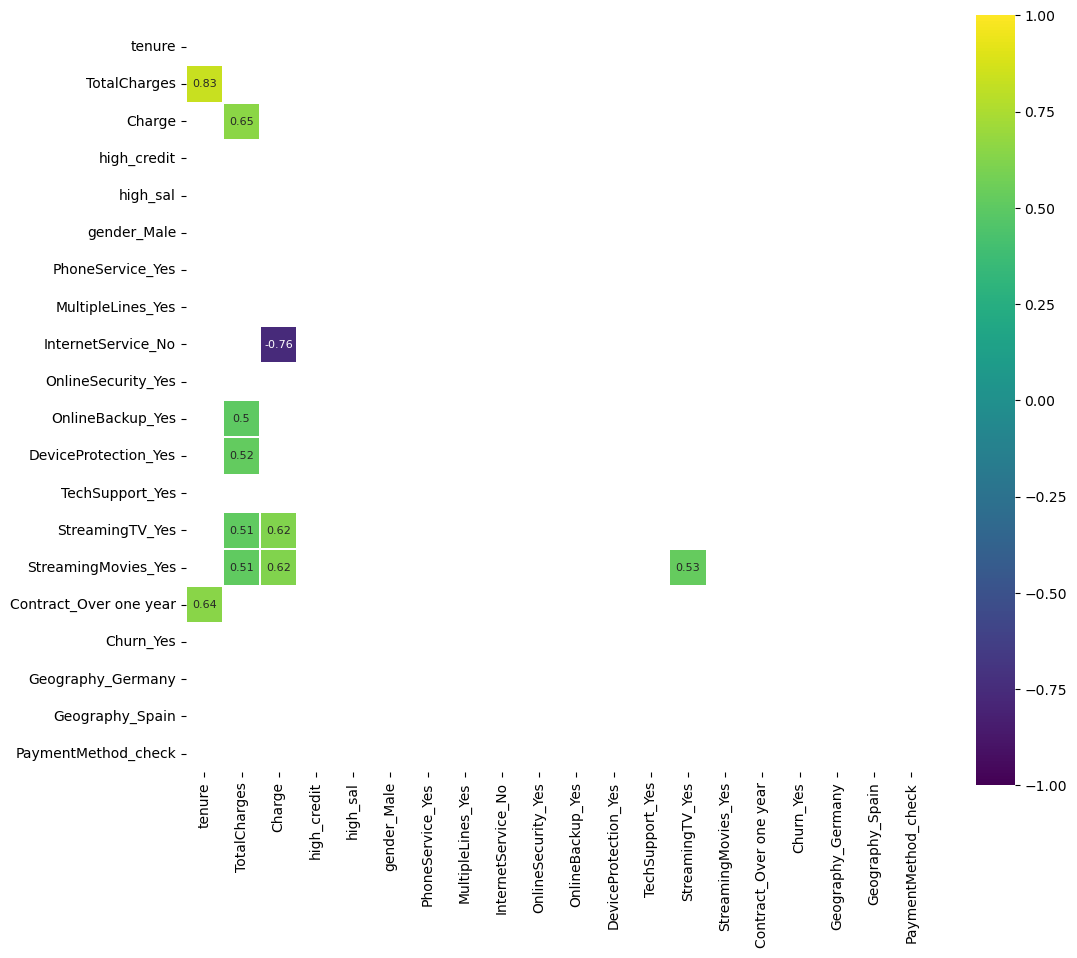

In [12]:
# Create Correlation to see the relationshop betwen the data

corr = data_for_model.corr()
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Only show the strong correlations
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='viridis',
            mask=mask,
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True);

In [13]:
# Create feature groups dictionary

features_dict = {
  'logistic'         : [
     
    'tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 
      #'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'

  ], 
    
    
    
    
    
 'tree'              : [

  
     
'tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 
     #'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'
 
 
 
 ], 
    
    
    
    
    
 'tree_sig'          : [
     
'tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 
     #'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'
 
 
 ],
    
    
    
    
    
    
    
 'forest'            :[

'tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 
     #'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'     
     
     
     
     
 ],
 'forest_sig'        : [
     
'tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 
     #'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'     
     
     
     
     
 ],    
 'forest_tuned'      : [

'tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 
     #'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'     
     
     
 ],
    
    
    
    
    
    
 'gbm'               : [
     

     
   'tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 
     #'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'
  
  
 ],
    
    
    
    
    
 'gbm_sig'           : [

      'tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 
     #'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'
  
  
 ], 
 'gbm_sig2'          : [
     'tenure', 'TotalCharges', 'Charge', 'high_credit', 'high_sal',
       'gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Over one year', 
     #'Churn_Yes',
       'Geography_Germany', 'Geography_Spain', 'PaymentMethod_check'
  
  
 ]
}

## Modeling

In order to build a predictive model that can accurately classify a given dataset, several models were considered and evaluated. These models include the Base Logistic Model, Base Tree Model, Random Forest, GBM Model, and Tuned Gradient Boosted Machines (GBM). Each model was trained and tested on a preprocessed and cleaned dataset using various evaluation metrics to assess their performance. The ultimate goal was to find the model that can achieve the highest accuracy on the test set while also having a low train-test gap, indicating that the model is not overfitting to the training data. This process of evaluating different models and selecting the one with the best performance is a crucial step in building a successful predictive model.


## Base Logistic Model

The logistic regression model achieved a training score of 0.8176 and a testing score of 0.7739, resulting in a train-test gap of 0.0437. The AUC score of the model is 0.7471, indicating that the model has a moderate ability to distinguish between positive and negative classes.

The coefficients of the model show the impact of each predictor variable on the response variable. The predictor variables with a positive coefficient have a positive impact on the response variable, while those with a negative coefficient have a negative impact. The PaymentMethod_check, Charge, and TotalCharges have a positive impact on churn, while tenure, high_sal, InternetService_No, gender_Male, high_credit, StreamingMovies_Yes, StreamingTV_Yes, Geography_Germany, DeviceProtection_Yes, Geography_Spain, MultipleLines_Yes, OnlineBackup_Yes, TechSupport_Yes, OnlineSecurity_Yes, Contract_Over one year, and PhoneService_Yes have a negative impact on churn. These coefficients can be used to identify the most important predictors of churn and to develop strategies to retain customers.



Lenght of oversampled data is 8688

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                  4344        0.5
no Churn               4344         0.5


=================== MODEL SUMMARY ===================

Model Type: Logistic Regression

Model Size: 20

---------------------------------

LR Training Score : 0.8176
LR Testing Score  : 0.7739
LR Train-Test Gap : 0.0437

LR AUC Score      : 0.7471

---------------------------------

Coefficients:

                        Coefficient
PaymentMethod_check        0.076441
Charge                     0.051180
TotalCharges               0.000519
tenure                    -0.063092
high_sal                  -0.096709
InternetService_No        -0.236962
gender_Male               -0.262113
high_credit               -0.315527
StreamingMovies_Yes       -0.373368
StreamingTV_Yes           -0.407877
Geography_Germany         -0.527426
DeviceProtection_Yes      -0.571180
Geography_Spain          

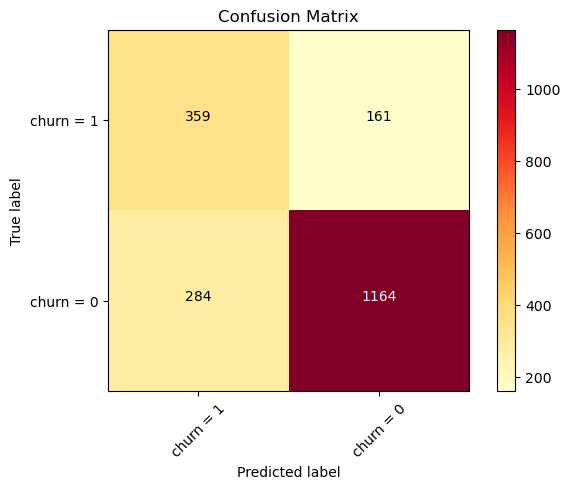

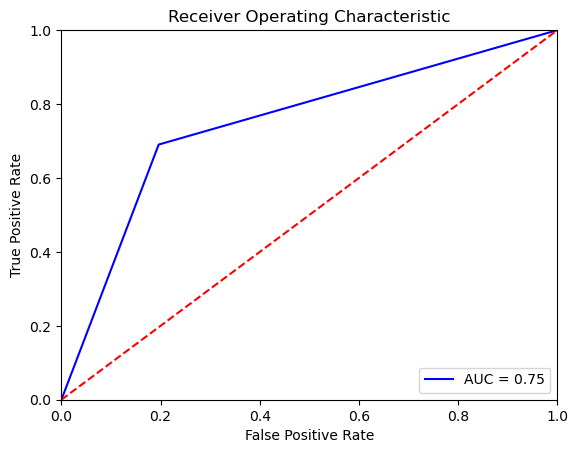

In [14]:
# Base Logistic Model (Variables = LOGISTIC)

# Specify explanatory variables
X = data_for_model.loc[:, features_dict['logistic']]

# Specify response variable
y = data_for_model.loc[:, 'Churn_Yes']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y              = os.fit_resample(X_train, y_train)
os_data_x                        = pd.DataFrame(data = os_data_x,columns = features_dict['logistic'] )
os_data_y                        = pd.Series(data=os_data_y)
n_churn                    = len(os_data_y[os_data_y==0])
n_no_churn                = len(os_data_y[os_data_y==0])
p_churn                    = len(os_data_y[ os_data_y==0])/len(os_data_x)
p_no_churn                = len(os_data_y[os_data_y==1])/len(os_data_x)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                  {n_churn}        {p_churn}
no Churn               {n_no_churn}         {p_no_churn}
""")


# Instantiate a logistic regression model
LR = LogisticRegression(solver       = 'lbfgs',
                        C            = 1,
                        random_state = 219,
                        max_iter     = 10000)


# Fit the logistic model
LR = LR.fit(os_data_x, os_data_y)

# Predict on test set
LR_pred = LR.predict(X_test)


# Create a dataframe of variable coefficients
lr_coeff = pd.DataFrame(LR.coef_[0], X.columns, columns=['Coefficient'])

# Filter out coefficients that equal 0 and sort by descending
lr_coeff = lr_coeff[lr_coeff['Coefficient'] != 0]\
                    .sort_values('Coefficient', ascending = False)

# Instantiate scores
LR_train_score = LR.score(os_data_x, os_data_y).round(4)
LR_test_score  = LR.score(X_test, y_test).round(4)
LR_test_gap    = abs(LR_test_score - LR_train_score).round(4)
LR_auc_score   = roc_auc_score(y_true  = y_test, y_score = LR_pred).round(4)
LR_report      = classification_report(y_test, 
                                       LR_pred,
                                       target_names = ['churn Failed (0)',
                                                       'churn Successful (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Logistic Regression

Model Size: {X.shape[1] + 1}

---------------------------------

LR Training Score : {LR_train_score}
LR Testing Score  : {LR_test_score}
LR Train-Test Gap : {LR_test_gap}

LR AUC Score      : {LR_auc_score}

---------------------------------

Coefficients:

{lr_coeff}
""")


##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
LR_tn, \
LR_fp, \
LR_fn, \
LR_tp = confusion_matrix(y_true = y_test, y_pred = LR_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LR_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['churn = 1','churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, LR_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Base Tree Model 
 The model's accuracy is 0.76, with a macro average F1-score of 0.72 and a weighted average F1-score of 0.77. The confusion matrix shows that the model predicted 1144 true negatives and 354 true positives, while misclassifying 304 false negatives and 166 false positives.



Lenght of oversampled data is 8688

Response Variable     Number    Proportion
-----------------     -------   -------------
churn                 4344        0.5
no churn              4344        0.5


=================== MODEL SUMMARY ===================

Model Type: Decision Tree

Model Size: 20

---------------------------------

Decision Tree Training Score : 0.7829
Decision Tree Testing Score  : 0.7612
Decision Tree Test-Gap       : 0.0217
Decision Tree AUC Score      : 0.7354

---------------------------------


              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1448
           1       0.54      0.68      0.60       520

    accuracy                           0.76      1968
   macro avg       0.71      0.74      0.72      1968
weighted avg       0.78      0.76      0.77      1968


Confusion Matrix: 

[[1144  304]
 [ 166  354]]


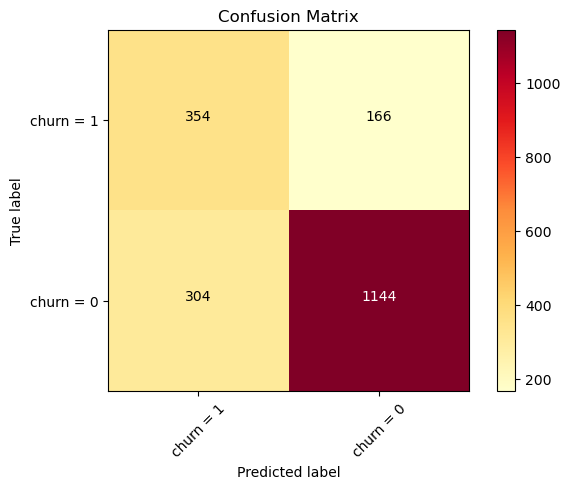

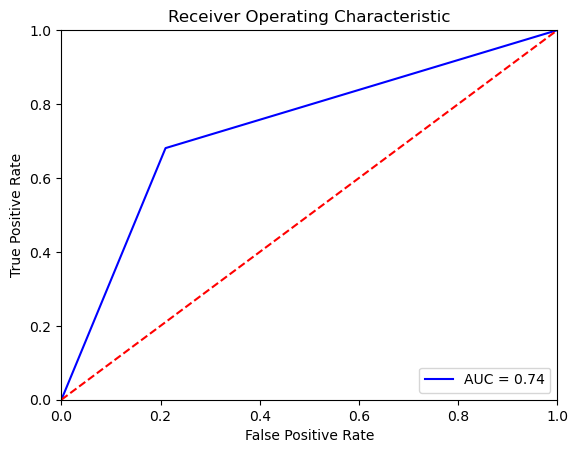

In [15]:
# Base Tree Model (Variables = TREE_SIG)

# Specify explanatory variables
X = data_for_model.loc[:, features_dict['tree_sig']]

# Save column names
column_names = X.columns

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(X)

# Transform explanatory variables
X_scaled = scaler.transform(X)
    
    
# Specify response variable
y = data_for_model.loc[:, 'Churn_Yes']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)  

# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y               = os.fit_resample(X_train, y_train)
os_data_x                         = pd.DataFrame(data = os_data_x,columns = features_dict['tree_sig'] )
os_data_y                         = pd.Series(data=os_data_y)
n_cross_sell                     = len(os_data_y[os_data_y==0])
n_no_cross_sell                  = len(os_data_y[os_data_y==0])
p_cross_sell                     = len(os_data_y[os_data_y==0])/len(os_data_x)
p_no_cross_sell                  = len(os_data_y[os_data_y==1])/len(os_data_x)






print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
churn                 {n_churn}        {p_churn}
no churn              {n_no_churn}        {p_no_churn}
""")


# Instantiate a classification tree object
baseTree = DecisionTreeClassifier(criterion = 'gini',
                                  splitter  = 'best',
                                  max_depth = 4,
                                  min_samples_leaf = 25,
                                  random_state = 219)

# Fit the training data
baseTree = baseTree.fit(os_data_x.values, os_data_y)


# Predict cross-selling
baseTree_pred = baseTree.predict(X_test)


# Reassign column names
os_data_x = pd.DataFrame(os_data_x, columns = column_names)


#####################
# Save scores
baseTree_train_score = baseTree.score(os_data_x.values, os_data_y).round(4) # accuracy
baseTree_test_score  = baseTree.score(X_test, y_test).round(4)   # accuracy
baseTree_test_gap    = abs(baseTree_test_score - baseTree_train_score).round(4)
baseTree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = baseTree_pred).round(4) # auc
baseTree_report      = classification_report(y_test, 
                                             baseTree_pred,
                                             target_names = [
                                                 'churn Failed (0)',
                                                 'churn Successful (1)'])

#####################
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Decision Tree

Model Size: {X.shape[1] + 1}

---------------------------------

Decision Tree Training Score : {baseTree_train_score}
Decision Tree Testing Score  : {baseTree_test_score}
Decision Tree Test-Gap       : {baseTree_test_gap}
Decision Tree AUC Score      : {baseTree_auc_score}

---------------------------------

""")




print(classification_report(y_test, baseTree_pred))

conf_m_logreg_smote = confusion_matrix(y_test, baseTree_pred)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)



##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
baseTree_tn, \
baseTree_fp, \
baseTree_fn, \
baseTree_tp = confusion_matrix(y_true = y_test, y_pred = baseTree_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, baseTree_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['churn = 1','churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = baseTree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, baseTree_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

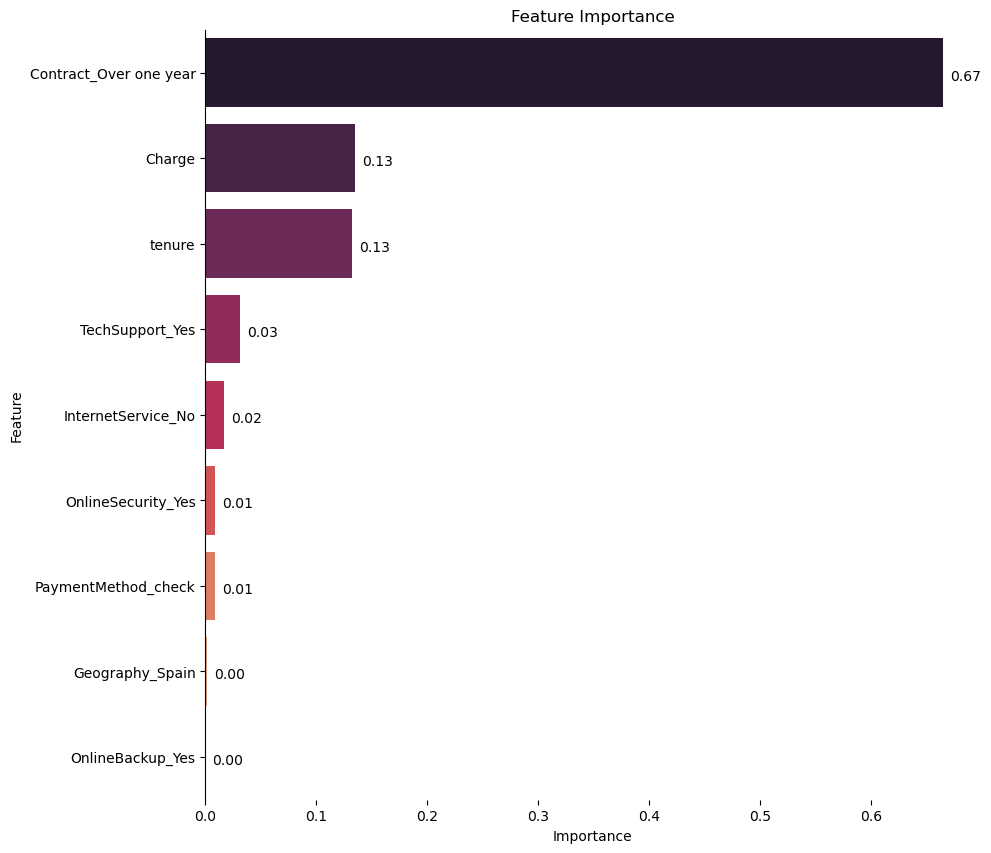

In [16]:
#Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(baseTree.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'rocket')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -30), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

## Random Forest 
The precision, recall and F1-score for the model indicate a relatively better performance than the previous models. The precision for 0 and 1 are 0.89 and 0.56 respectively, recall for 0 and 1 are 0.80 and 0.73 respectively and the F1-score is 0.84 and 0.63 for 0 and 1 respectively. 



Lenght of oversampled data is 8688

Response Variable     Number    Proportion
-----------------     -------   -------------
churn                 4344        0.5
no churn              4344        0.5


=================== MODEL SUMMARY ===================

Model Type: Random Forest

Model Size: 20

---------------------------------

RF Training Score : 0.8542
RF Testing Score  : 0.7779
RF Train-Test Gap : 0.0763

RF AUC Score      : 0.7622

---------------------------------


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1448
           1       0.56      0.73      0.63       520

    accuracy                           0.78      1968
   macro avg       0.73      0.76      0.74      1968
weighted avg       0.80      0.78      0.79      1968


Confusion Matrix: 

[[1152  296]
 [ 141  379]]


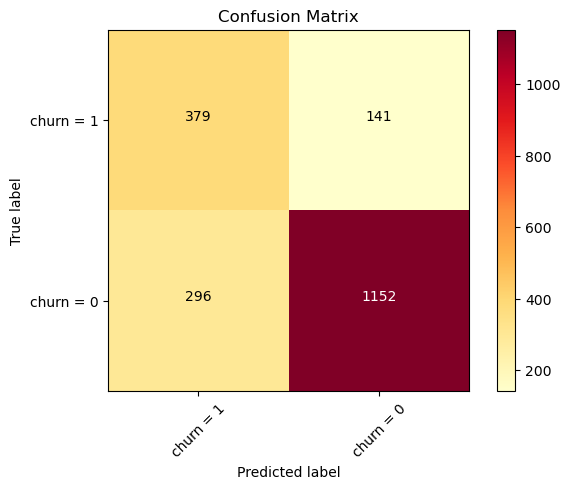

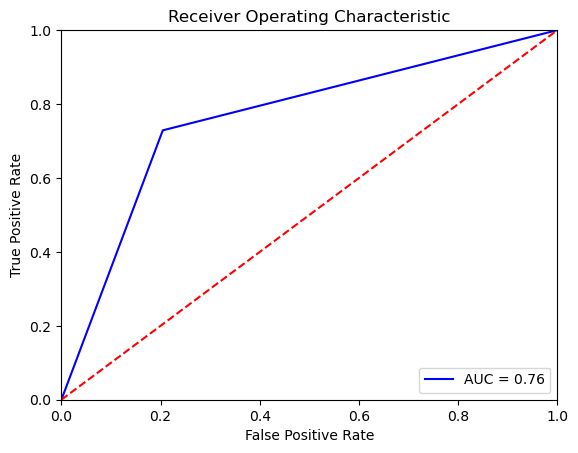

In [18]:

# Prepare data

# Specify explanatory variables
X = data_for_model.loc[:, features_dict['forest']]

# Save column names
column_names = X.columns

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(X)

# Transform explanatory variables
X_scaled = scaler.transform(X)


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y) 

# Oversample
######################################
os                        = SMOTE(random_state=0)

os_data_x,os_data_y       = os.fit_resample(X_train, y_train)
os_data_x                 = pd.DataFrame(data = os_data_x,columns = features_dict['forest'] )
os_data_y                 = pd.Series(data=os_data_y)

n_churn                   = len(os_data_y[os_data_y==0])
n_no_churn                 = len(os_data_y[os_data_y==0])
p_churn                   = len(os_data_y[os_data_y==0])/len(os_data_x)
p_no_churn                = len(os_data_y[ os_data_y==1])/len(os_data_x)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
churn                 {n_churn}        {p_churn}
no churn              {n_no_churn}        {p_no_churn}
""")

# Reassign column names
os_data_x = pd.DataFrame(os_data_x.values, columns = column_names)

##############################################################################
# Create Model

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 1000,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

# FITTING the training data
rf_default = rf_default.fit(os_data_x.values, os_data_y)


# PREDICTING based on the testing set
rf_default_pred = rf_default.predict(X_test)


# Instantiate scores
rf_train_score = rf_default.score(os_data_x.values, os_data_y).round(4)
rf_test_score  = rf_default.score(X_test, y_test).round(4)
rf_test_gap    = abs(rf_test_score - rf_train_score).round(4)
rf_auc_score   = roc_auc_score(y_true  = y_test, y_score = rf_default_pred).round(4)
rf_report      = classification_report(y_test, 
                                       rf_default_pred,
                                       target_names = ['churn (0)',
                                                       'churn Successful (1)'])
# Print results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Random Forest

Model Size: {X.shape[1] + 1}

---------------------------------

RF Training Score : {rf_train_score}
RF Testing Score  : {rf_test_score}
RF Train-Test Gap : {rf_test_gap}

RF AUC Score      : {rf_auc_score}

---------------------------------

""")


print(classification_report(y_test, rf_default_pred))

conf_m_logreg_smote = confusion_matrix(y_test, rf_default_pred)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)



##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_default_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['churn = 1','churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = rf_default.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_default_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


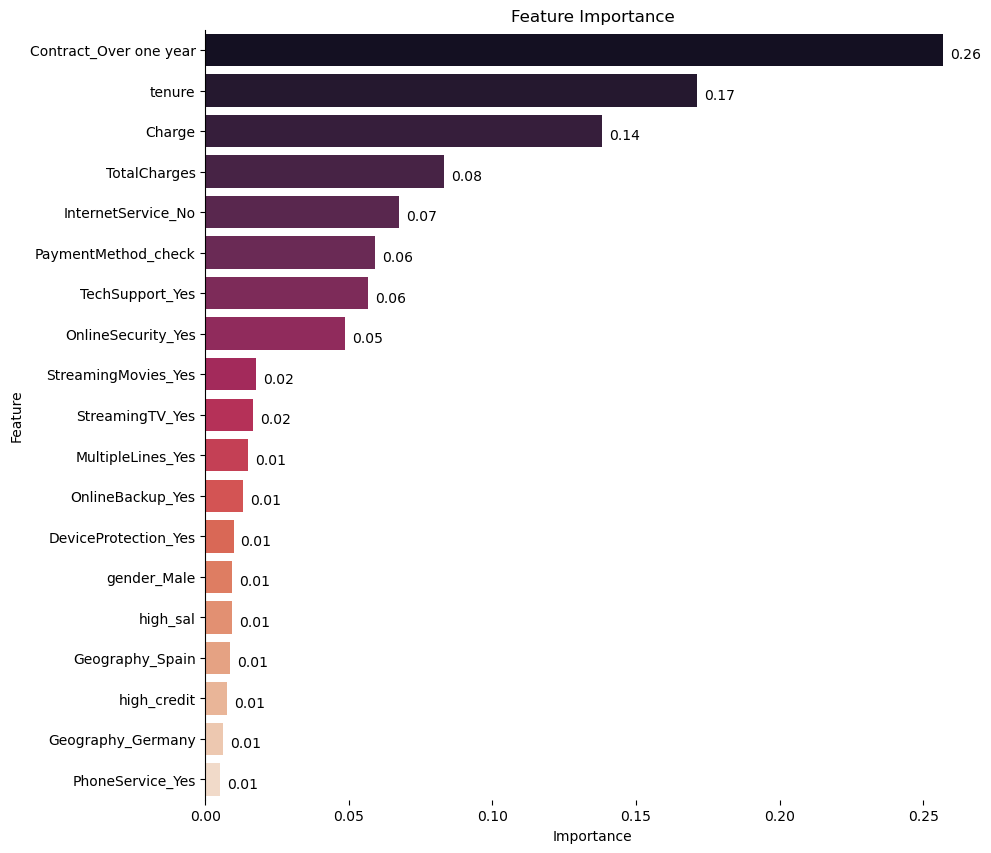

In [19]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(rf_default.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'rocket')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

## Tuned Random Forest
The model's training score is 0.753, while the testing score is 0.8242, which is a relatively good performance. The train-test gap is 0.0712, which indicates a slightly better performance on the training set than the testing set. The model's AUC score is 0.7314, which is a metric that measures the model's ability to distinguish between the positive and negative classes. In this case, the model's precision is 0.73, recall is 0.53, and F1-score is 0.62 for the positive class, indicating that the model performs well at identifying the negative class, but not as well at identifying the positive class.



Lenght of oversampled data is 8688

Response Variable     Number    Proportion
-----------------     -------   -------------
churn                  4344        0.5
no churn               4344        0.5



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(



=================== MODEL SUMMARY ===================

Model Type: Random Forest Tuned

Model Size: 20

---------------------------------

Tuned Forest Training Score : 0.753
Tuned Forest Testing Score  : 0.8242
Tuned Forest Train-Test Gap : 0.0712

Tuned Forest AUC Score      : 0.7314

---------------------------------


              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1448
           1       0.73      0.53      0.62       520

    accuracy                           0.82      1968
   macro avg       0.79      0.73      0.75      1968
weighted avg       0.82      0.82      0.81      1968


Confusion Matrix: 

[[1344  104]
 [ 242  278]]


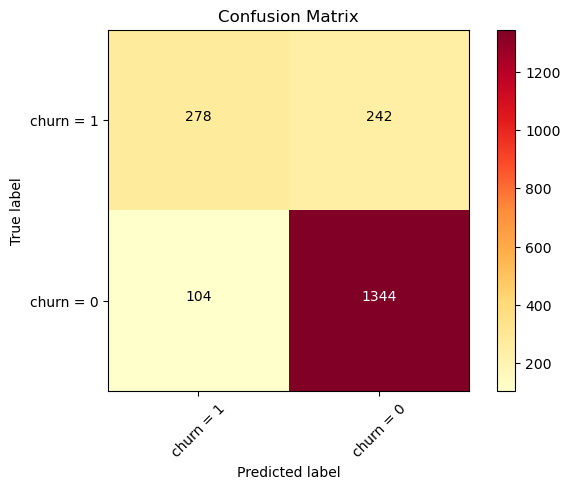

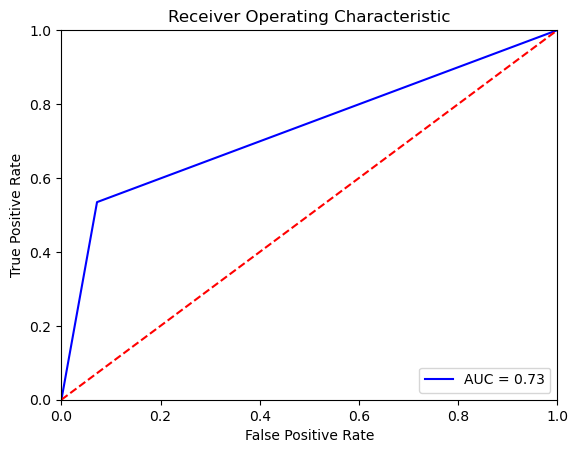

In [20]:
# Prepare data

# Specify explanatory variables
X = data_for_model.loc[:, features_dict['gbm_sig2']]

# Save column names
column_names = X.columns

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(X.values)

# Transform explanatory variables
X_scaled = scaler.transform(X.values)


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X.values,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)    


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y             = os.fit_resample(X_train, y_train)
os_data_x                       = pd.DataFrame(data = os_data_x,columns = features_dict['gbm_sig2'] )
os_data_y                       = pd.Series(data=os_data_y)

n_churn                         = len(os_data_y[os_data_y==0])
n_no_churn                      = len(os_data_y[os_data_y==0])
p_churn                          = len(os_data_y[os_data_y==0])/len(os_data_x)
p_no_churn                       = len(os_data_y[os_data_y==1])/len(os_data_x)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
churn                  {n_churn}        {p_churn}
no churn               {n_no_churn}        {p_no_churn}
""")

##############################################################################
# Tune Hyperparameters

# declaring a hyperparameter space
estimator_space  = np.arange(140, 180, 10)
criterion_space  = ['gini', 'entropy']
depth_space      = np.arange(5, 9, 1)
#leaf_space       = np.arange(1, 10, 1)
bootstrap_space  = [True, False]
warm_start_space = [True, False]
#split_space      = np.arange(1, 525, 25)
#features_space   = np.arange(1, 14, 1)


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'criterion'        : criterion_space,
              'max_depth'        : depth_space,
#              'min_samples_leaf' : leaf_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv           = 3,
                               n_iter       = 10,
                               random_state = 219,
                               scoring      = make_scorer(roc_auc_score,
                                              needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(X.values, y)


# PREDICT step is not needed


##############################################################################
# Create tuned model

# Instantiate model
rf_tuned = forest_cv.best_estimator_


# Fit the  model
rf_tuned = rf_tuned.fit(os_data_x.values, os_data_y)


# Predict on test set
rf_tuned_pred = rf_tuned.predict(X_test)


# Reassign column names
os_data_x = pd.DataFrame(os_data_x.values, columns = column_names)


# Instantiate scores
rf_tuned_train_score = rf_tuned.score(os_data_x.values, os_data_y).round(4)
rf_tuned_test_score  = rf_tuned.score(X_test, y_test).round(4)
rf_tuned_test_gap    = abs(rf_tuned_test_score - rf_tuned_train_score).round(4)
rf_tuned_auc_score   = roc_auc_score(y_true  = y_test, y_score = rf_tuned_pred).round(4)
rf_tuned_report      = classification_report(y_test, 
                                       rf_tuned_pred,
                                       target_names = ['churn Failed (0)',
                                                       'churn Successful (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Random Forest Tuned

Model Size: {X.shape[1] + 1}

---------------------------------

Tuned Forest Training Score : {rf_tuned_train_score}
Tuned Forest Testing Score  : {rf_tuned_test_score}
Tuned Forest Train-Test Gap : {rf_tuned_test_gap}

Tuned Forest AUC Score      : {rf_tuned_auc_score}

---------------------------------

""")



print(classification_report(y_test,rf_tuned_pred))

conf_m_logreg_smote = confusion_matrix(y_test, rf_tuned_pred)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)

##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
rf_tuned_tn, \
rf_tuned_fp, \
rf_tuned_fn, \
rf_tuned_tp = confusion_matrix(y_true = y_test, y_pred = rf_tuned_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_tuned_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['churn = 1','churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = rf_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_tuned_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


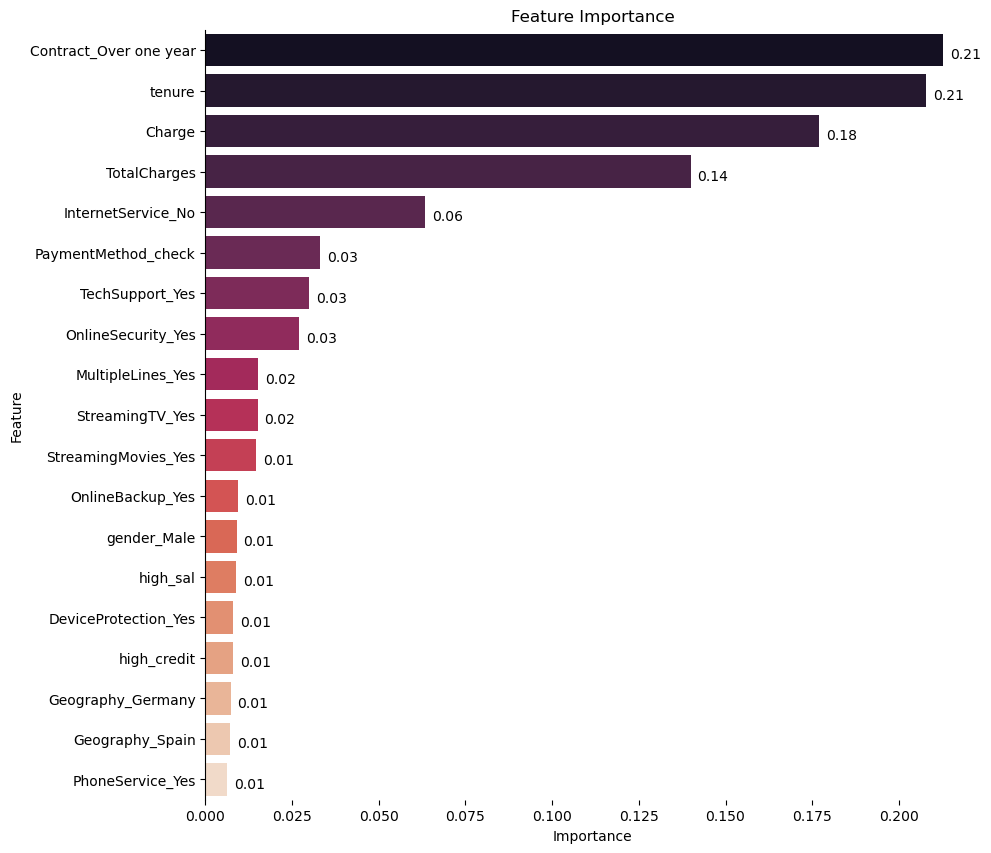

In [22]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(rf_tuned.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'rocket')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

## GBM Model
The model has a training score of 0.874 and a testing score of 0.7876, which means that the model is not overfitting the training data, and it has a decent ability to generalize to new data.

The AUC score of the model is 0.7158, which indicates that the model has some predictive power, but there is still room for improvement.



Lenght of oversampled data is 8688

Response Variable     Number    Proportion
-----------------     -------   -------------
churn                 4344        0.5
No churn              4344        0.5


=================== MODEL SUMMARY ===================

Model Type: GBM

Model Size: 20

---------------------------------

GBM Training Score : 0.874
GBM Testing Score  : 0.7876
GBM Train-Test Gap : 0.0864

GBM AUC Score      : 0.7158

---------------------------------


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1448
           1       0.61      0.56      0.58       520

    accuracy                           0.79      1968
   macro avg       0.73      0.72      0.72      1968
weighted avg       0.78      0.79      0.79      1968


Confusion Matrix: 

[[1257  191]
 [ 227  293]]


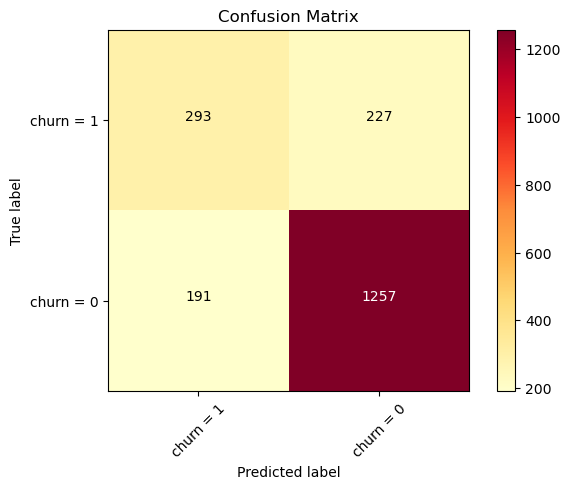

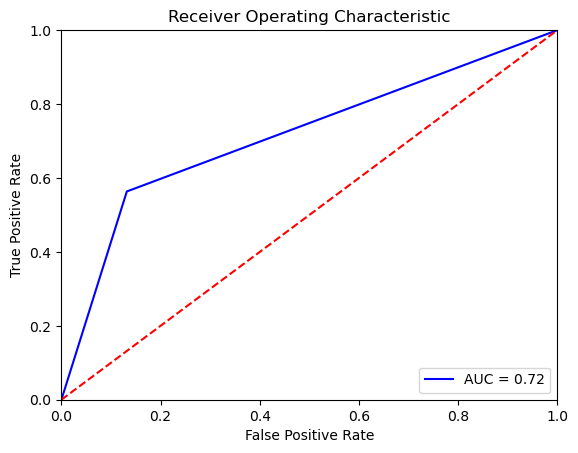

In [23]:

# Prepare data

# Specify explanatory variables
X = data_for_model.loc[:, features_dict['gbm_sig2']]

# Specify response variable
y = data_for_model.loc[:, 'Churn_Yes' ]


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X.values,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y              = os.fit_resample(X_train, y_train)
os_data_x                        = pd.DataFrame(data = os_data_x,columns = features_dict['gbm_sig2'] )
os_data_y                        = pd.Series(data=os_data_y)

n_churn                          = len(os_data_y[os_data_y==0])
n_no_churn                       = len(os_data_y[os_data_y==0])
p_churn                          = len(os_data_y[ os_data_y==0])/len(os_data_x)
p_no_churn                       = len(os_data_y[os_data_y==1])/len(os_data_x)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
churn                 {n_churn}        {p_churn}
No churn              {n_no_churn}        {p_no_churn}
""")


##############################################################################
# Create model

# INSTANTIATING the model object without hyperparameters
gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                         learning_rate = 0.1,
                                         n_estimators  = 100,
                                         criterion     = 'friedman_mse',
                                         max_depth     = 3,
                                         warm_start    = False,
                                         random_state  = 219)

# FIT step is needed as we are not using .best_estimator
gbm_default = gbm_default.fit(os_data_x.values, os_data_y)


# PREDICTING based on the testing set
gbm_default_pred = gbm_default.predict(X_test)


# Instantiate scores
gbm_default_train_score = gbm_default.score(os_data_x.values, os_data_y).round(4)
gbm_default_test_score  = gbm_default.score(X_test, y_test).round(4)
gbm_default_test_gap    = abs(gbm_default_test_score - gbm_default_train_score).round(4)
gbm_default_auc_score   = roc_auc_score(y_true  = y_test, y_score = gbm_default_pred).round(4)
gbm_default_report      = classification_report(y_test, 
                                       gbm_default_pred,
                                       target_names = ['churn Failed (0)',
                                                       'churn Successful (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM

Model Size: {X.shape[1] + 1}

---------------------------------

GBM Training Score : {gbm_default_train_score}
GBM Testing Score  : {gbm_default_test_score}
GBM Train-Test Gap : {gbm_default_test_gap}

GBM AUC Score      : {gbm_default_auc_score}

---------------------------------

""")



print(classification_report(y_test,gbm_default_pred))

conf_m_logreg_smote = confusion_matrix(y_test, gbm_default_pred)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)



##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = gbm_default_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, gbm_default_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['churn = 1','churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = gbm_default.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, gbm_default_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


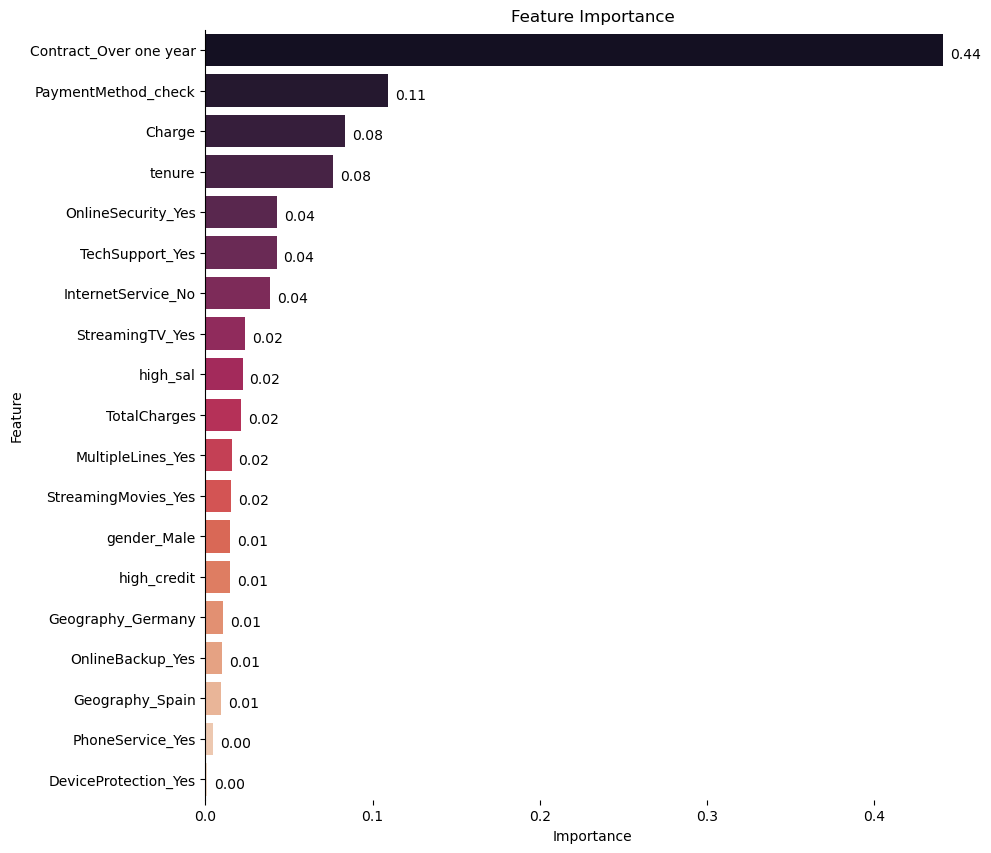

In [24]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(gbm_default.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'rocket')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

## Tuned Gradient Boosted Machines (GBM)

This second version of the GBM model is much better than the first one. It has a higher testing score and a lower train-test gap, which indicates that it is less overfit to the training data. Additionally, the AUC score is significantly higher, indicating that the model is better at distinguishing between the positive and negative classes.

Looking at the classification report, we can see that the model has significantly higher precision and recall for both the positive and negative classes. The f1-score is also higher for both classes. The accuracy is significantly higher than the first version as well, which is to be expected given the higher precision, recall, and f1-score.

The confusion matrix shows that the model has only misclassified 190 of the 1968 samples. Specifically, it misclassified 66 negative samples as positive (false positives) and 124 positive samples as negative (false negatives).


=================== MODEL SUMMARY ===================

Model Type: GBM Tuned

Model Size: 20

---------------------------------

Tuned GBM Training Score : 0.8238
Tuned GBM Testing Score  : 0.9035
Tuned GBM Train-Test Gap : 0.0797

Tuned GBM AUC Score      : 0.858

---------------------------------


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1448
           1       0.86      0.76      0.81       520

    accuracy                           0.90      1968
   macro avg       0.89      0.86      0.87      1968
weighted avg       0.90      0.90      0.90      1968


Confusion Matrix: 

[[1382   66]
 [ 124  396]]


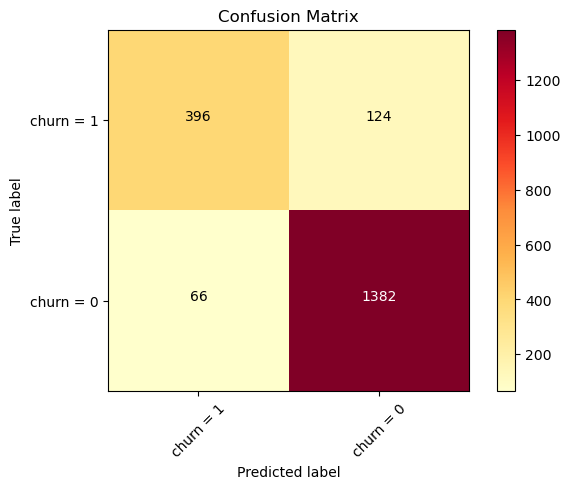

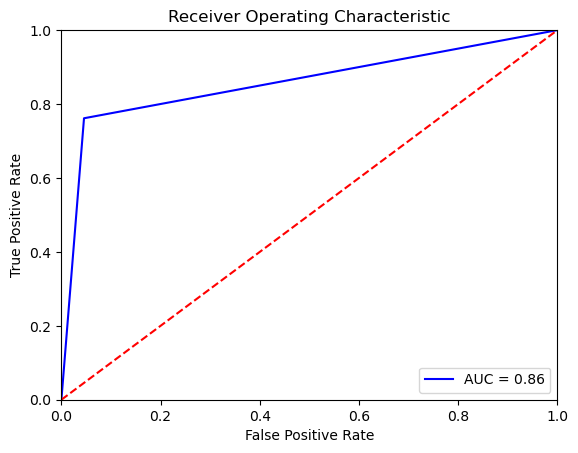

In [25]:
# GBM Tuned

# declaring a hyperparameter space
learn_space        = np.arange(0.1, 3.0, 0.1)
estimator_space    = np.arange(120, 150, 10)
depth_space        = np.arange(3, 5, 1)
warm_start_space   = [True, False]

#min_split_space    = np.arange(2, 400, 100)
#max_features_space = ['auto', 'sqrt', 'log2']
#loss_space         = ['deviance', 'exponential']
#criterion_space    = ['friedman_mse', 'mse', 'mae']

# creating a hyperparameter grid
param_grid = {'learning_rate'     : learn_space,
              'n_estimators'      : estimator_space,
              'max_depth'         : depth_space,
#              'min_samples_split' : min_split_space,
#              'max_features'      : max_features_space,
#              'loss'              : loss_space,
#              'criterion'         : criterion_space,
              'warm_start'        : warm_start_space}

# INSTANTIATING the model object without hyperparameters
gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
gbm_cv = RandomizedSearchCV(estimator          = gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
gbm_cv.fit(X.values, y)


##############################################################################
# Create tuned model

# Instantiate a logistic regression model
gbm_tuned = gbm_cv.best_estimator_

# FIT step is needed as we are not using .best_estimator
gbm_tuned = gbm_tuned.fit(os_data_x.values, os_data_y)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(X_test)


# Instantiate scores
gbm_tuned_train_score = gbm_tuned.score(os_data_x.values, os_data_y).round(4)
gbm_tuned_test_score  = gbm_tuned.score(X_test, y_test).round(4)
gbm_tuned_test_gap    = abs(gbm_tuned_test_score - gbm_tuned_train_score).round(4)
gbm_tuned_auc_score   = roc_auc_score(y_true  = y_test, y_score = gbm_tuned_pred).round(4)
gbm_tuned_report      = classification_report(y_test, 
                                       gbm_tuned_pred,
                                       target_names = ['churn Failed (0)',
                                                       'churn Successful (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM Tuned

Model Size: {X.shape[1] + 1}

---------------------------------

Tuned GBM Training Score : {gbm_tuned_train_score}
Tuned GBM Testing Score  : {gbm_tuned_test_score}
Tuned GBM Train-Test Gap : {gbm_tuned_test_gap}

Tuned GBM AUC Score      : {gbm_tuned_auc_score}

---------------------------------

""")

print(classification_report(y_test,gbm_tuned_pred))

conf_m_logreg_smote = confusion_matrix(y_test,gbm_tuned_pred)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)



##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, gbm_tuned_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['churn = 1','churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = gbm_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, gbm_tuned_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

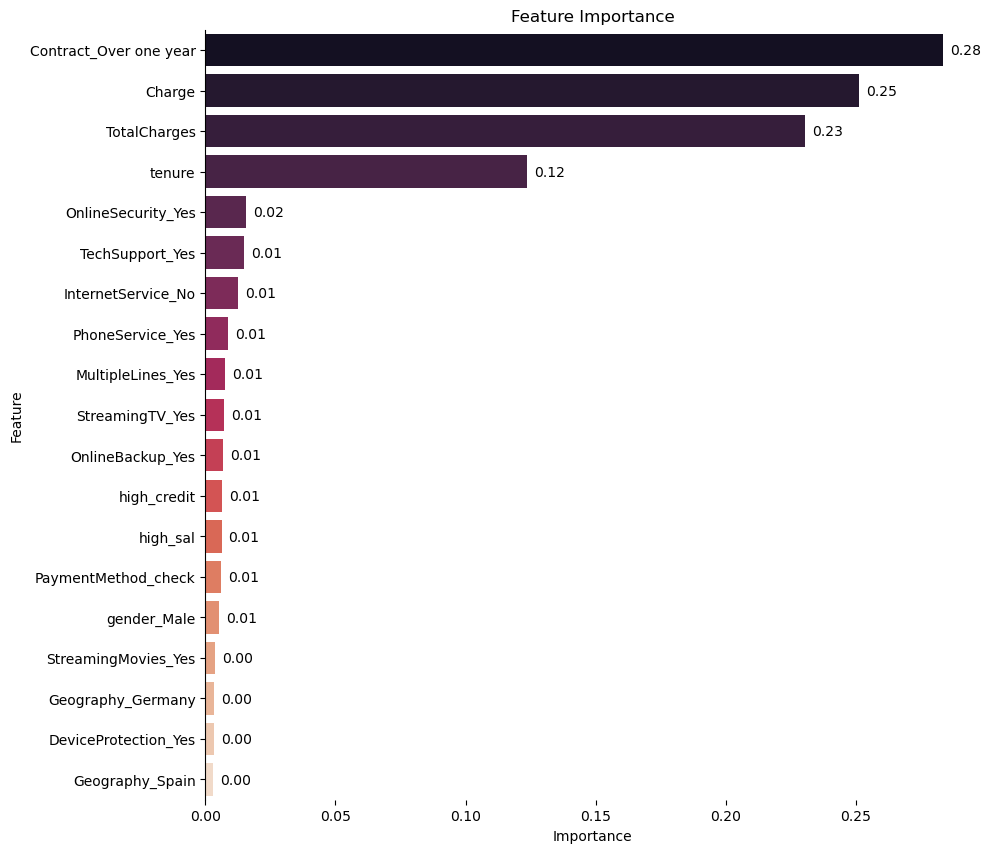

In [26]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(gbm_tuned.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'rocket')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -15), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

In [27]:
# Print end result
# Time of script
t1 = time.time()

script_time = round((t1-t0)/60, 2)


# Compare results
print(f"""

======================================== Model Comparison ========================================


Model           Train Acc.   Test Acc.       Gap         AUC Score    TN,  FP, FN,  TP
-----           ----------   ---------       ------      ---------    ----------------
Logistic        {LR_train_score}          {LR_test_score}        {LR_test_gap}       {LR_auc_score}       {LR_tn, LR_fp, LR_fn, LR_tp}
Decision Tree   {baseTree_train_score}         {baseTree_test_score}        {baseTree_test_gap}       {baseTree_auc_score}       {baseTree_tn, baseTree_fp, baseTree_fn, baseTree_tp}
Random Forest   {rf_train_score}         {rf_test_score}        {rf_test_gap}        {rf_auc_score}       {rf_tn, rf_fp, rf_fn, rf_tp}
Tuned RF        {rf_tuned_train_score}          {rf_tuned_test_score}        {rf_tuned_test_gap}       {rf_tuned_auc_score}       {rf_tuned_tn, rf_tuned_fp, rf_tuned_fn, rf_tuned_tp}
GBM             {gbm_default_train_score}          {gbm_default_test_score}        {gbm_default_test_gap}       {gbm_default_auc_score}       {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
Tuned GBM       {gbm_tuned_train_score}         {gbm_tuned_test_score}        {gbm_tuned_test_gap}       {gbm_tuned_auc_score}        {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}         



     /-----------------------------------------------------------------------------------\\
     | Tuned GBM is the best model with an AUC of {gbm_tuned_auc_score} and a train-test gap of {gbm_tuned_test_gap}  |
     \\-----------------------------------------------------------------------------------/
""")



# Tuned LR      {LR_tuned_test_gap}              {LR_tuned_auc_score}          {LR_tuned_tn, LR_tuned_fp, LR_tuned_fn, LR_tuned_tp}
# Tuned Tree    {tree_tuned_test_gap}              {tree_tuned_auc_score}         {tree_tuned_tn, tree_tuned_fp, tree_tuned_fn, tree_tuned_tp}

print(f"""
Total script run time: {script_time} minutes

""")



======================================== Model Comparison ========================================


Model           Train Acc.   Test Acc.       Gap         AUC Score    TN,  FP, FN,  TP
-----           ----------   ---------       ------      ---------    ----------------
Logistic        0.8176          0.7739        0.0437       0.7471       (1164, 284, 161, 359)
Decision Tree   0.7829         0.7612        0.0217       0.7354       (1144, 304, 166, 354)
Random Forest   0.8542         0.7779        0.0763        0.7622       (1152, 296, 141, 379)
Tuned RF        0.753          0.8242        0.0712       0.7314       (1344, 104, 242, 278)
GBM             0.874          0.7876        0.0864       0.7158       (1257, 191, 227, 293)
Tuned GBM       0.8238         0.9035        0.0797       0.858        (1382, 66, 124, 396)         



     /-----------------------------------------------------------------------------------\
     | Tuned GBM is the best model with an AUC of 0.858 and a